In [2]:
import numpy as np
import matplotlib.pyplot as plt

Metoda Gaussa Seidla jest numeryczną metodą rozwiązywania równań. Jeżeli mamy układ równań postaci:

\begin{equation}
a_{11}x_1 + a_{12}x_2 + a_{13}x_3 = b_1 \\
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 = b_2 \\
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 = b_3
\end{equation}

to metoda wygląda następująco:

1) Wyznaczamy z pierwszego równania pierwszą zmienną, z drugiego drugą i trzeciego trzecią:

\begin{equation}
x_1  = (b_1  - a_{12} x_2 - a_{13}  x_3) / a_{11} \\
x_2  = (b_2  - a_{21} x_1 - a_{23} x_3) / a_{22} \\
x_3  = (b_3  - a_{31} x_1 - a_{32} x_2) / a_{33}
\end{equation}


2) Przyjmujemy dowolne trzy wartości “początkowe” dla każdej zmiennej, np. $x = [0, 0, 0]$.

3) Powtarzamy w kółko wyliczanie wartości kolejnych zmiennych według powyższych wzorów, aktualizując po każdym kroku wartości zmiennej \
i wykorzystując je w kolejnych wyliczeniach (przykład: https://pl.wikipedia.org/wiki/Metoda_Gaussa-Seidla#Przyk%C5%82ady). 

W każdym kolejnym kroku algorytmu aktualne wartości zmiennych będą coraz bliższe wartościom, które są rozwiązaniem tego układu równań.

**Zaimplementuj metodę Gaussa Seidla dla układu trzech równań.** Przyjmijmy, że współczynniki $a_{ij}$ przechowywane będą w numpy’owej macierzy 3x3,\
a współczynniki $b_1$, $b_2$, $b_3$ w tablicy o długości 3.

a) Zaimplementuj metodę dla określonej liczby iteracji (np. 30). Sprawdź, czy dla macierzy $A$ współczynników $a_{ij}$ postaci:

\begin{bmatrix}
5 & 2 & 1 \\
2 & 3 & 1 \\
1 & 2 & 4
\end{bmatrix}

oraz współczynników $b = [ 12, 11, 17]$ metoda znajduje poprawne rozwiązanie, czyli $x_1 = 1$, $x_2 = 2$, $x_3 = 3$. Przyjmij za wartości startowe $x = [0, 1, 5]$.

In [14]:
a = np.array([[5, 2, 1],
              [2, 3, 1],
              [1, 2, 4]])

b = np.array([12, 11, 17])

x = np.array([0, 0, 0])

In [15]:
for _ in range(30):
    
    x[0]  = (b[0]  - a[0][1] * x[1] - a[0][2] * x[2]) / a[0][0]
    x[1]  = (b[1]  - a[1][0] * x[0] - a[1][2] * x[2]) / a[1][1]
    x[2]  = (b[2]  - a[2][0] * x[0] - a[2][1] * x[1]) / a[2][2]
    
print(x)    

[1 2 3]


b) Zaimplementuj metodę tak, aby zatrzymywała się po uzyskaniu zbieżności - kiedy różnice między wartościami zmiennych w kolejnych iteracjach nie różnią się o więcej niż 0,01%. Ale jednocześnie przyjmijmy, że metoda nie może wykonać więcej niż 50 iteracji - jeżeli w takim czasie nie uzyska zbieżności to i tak zatrzymujemy jej działanie (w takiej sytuacji kod powinien wypisać komunikat o braku uzyskania zbieżności). Przetestuj jej działanie na różnych przypadkach, samodzielnie dobierając dowolne współczynniki $a$ i $b$, ale tak aby rozwiązaniem były wartości $x = [1, 2, 3]$, a w macierzy $A$ wartości na przekątnej (wartości $a_{11}$, $a_{22}$, $a_{33}$) były największe w swoich kolumnach i wierszach (tak jak to jest w przykładzie z punktu a) - wtedy mamy pewność, że metoda zadziała).

In [12]:
a = np.array([[5, 2, 1],
              [1, 3, 3],
              [1, 1, 5]])

b = a.dot([1, 2, 3])

x = np.array([0, 0, 0])

In [13]:
x0 = np.array([0, 0, 0])

for i in range(50):
    
    x0[:] = x
    
    x[0]  = (b[0]  - a[0][1] * x[1] - a[0][2] * x[2]) / a[0][0]
    x[1]  = (b[1]  - a[1][0] * x[0] - a[1][2] * x[2]) / a[1][1]
    x[2]  = (b[2]  - a[2][0] * x[0] - a[2][1] * x[1]) / a[2][2]
    
    if all(np.abs(x - x0) < 0.0001 * np.abs(x0)):
        
        print(f"Po {i+1} iteracjach uzyskano rozwiązanie: x = {x}")
        break
        
    if i == 49:
        print(f"Brak zbieżności po wykonaniu {i+1} iteracji!")

Po 5 iteracjach uzyskano rozwiązanie: x = [1 2 3]


c) Dla dowolnego przykładu narysuj wykres, na którym przedstawisz wartości poszczególnych zmiennych w zależności od iteracji (trzy linie na jednym wykresie odpowiadające wartościom trzech zmiennych w kolejnych krokach metody).

In [8]:
a = np.array([[5, 2, 1],
              [1, 3, 3],
              [1, 1, 5]])

b = a.dot([1, 5, 3])

x = np.array([0, 0, 0])

Po 4 iteracjach uzyskano rozwiązanie: x = [1 5 3]


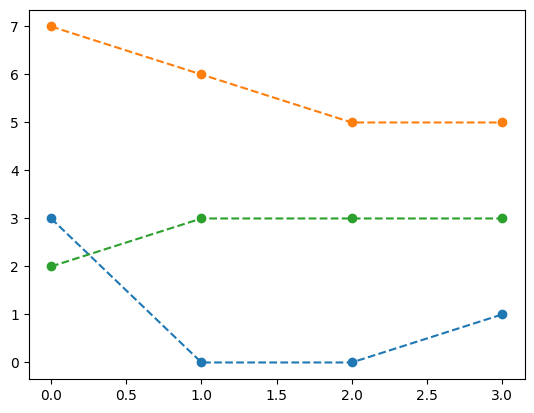

In [9]:
x0 = np.array([0, 0, 0])
x0[:] = x
x_list = np.zeros([50, 3])

for i in range(50):
    
    x[0]  = (b[0]  - a[0][1] * x[1] - a[0][2] * x[2]) / a[0][0]
    x[1]  = (b[1]  - a[1][0] * x[0] - a[1][2] * x[2]) / a[1][1]
    x[2]  = (b[2]  - a[2][0] * x[0] - a[2][1] * x[1]) / a[2][2]
    
    x_list[i] = x
    
    if all(np.abs(x - x0) < 0.0001 * np.abs(x0)):
        
        print(f"Po {i} iteracjach uzyskano rozwiązanie: x = {x}")
        break
        
    if i == 49:
        print(f"Brak zbieżności po wykonaniu {i+1} iteracji!")  
    
    x0[:] = x
        
plt.plot(range(i), x_list[0:i, :], 'o--')
plt.show()

d) Zaimplementuj metodę Gaussa Seidla w postaci funkcji z argumentami:

- A - macierz współczynników $a$
- b  - tablica współczynników $b$
- x_start - tablica początkowych wartości dla zmiennych
- tol - względna różnica między kolejnymi wartości, poniżej której uznajemy, że uzyskaliśmy zbieżność 
- max_iter - dopuszczalna liczba iteracji
- add_plot - wartość logiczna mówiąca o tym, czy funkcja dodatkowo ma wyświetlić wykres z przebiegu działania algorytmu

Funkcja powinna zwracać tablicę z trzema wartościami będącymi rozwiązaniem układu równań.

In [10]:
def gauss_seidl_method(A, b, x_start=np.array([0, 0, 0]), tol=0.0001, max_iter=50, add_plot=False):
    
    x0 = np.array([0, 0, 0])
    x0[:] = x_start
    x_list = np.zeros([max_iter, 3])

    for i in range(max_iter):

        x[0]  = (b[0]  - A[0][1] * x[1] - A[0][2] * x[2]) / A[0][0]
        x[1]  = (b[1]  - A[1][0] * x[0] - A[1][2] * x[2]) / A[1][1]
        x[2]  = (b[2]  - A[2][0] * x[0] - A[2][1] * x[1]) / A[2][2]
        
        x_list[i] = x

        if all(np.abs(x - x0) < tol * np.abs(x0)):

            print(f"Po {i} iteracjach uzyskano rozwiązanie: x = {x}")
            break
            
        if i == 49:
            print(f"Brak zbieżności po wykonaniu {i+1} iteracji!")

        x0[:] = x

    if add_plot:
        plt.plot(range(i), x_list[0:i, :], 'o--')
        plt.show()
        
    return x

Po 2 iteracjach uzyskano rozwiązanie: x = [1 2 3]


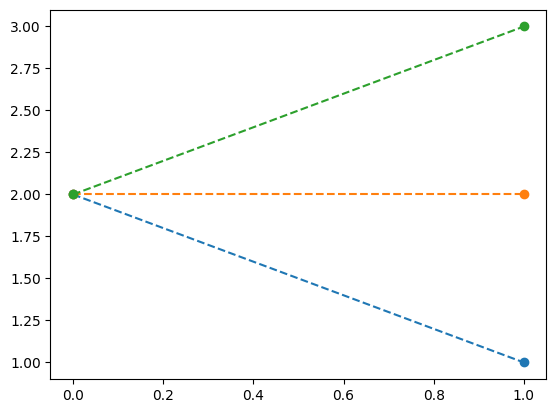

In [11]:
a = np.array([[5, 2, 1],
              [2, 3, 1],
              [1, 2, 4]])

b = np.array([12, 11, 17])

x = np.array([0, 0, 0])

x_solve = gauss_seidl_method(a, b, add_plot=True)